In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(return_X_y = False)

data = diabetes.data
headers = diabetes.feature_names
target = diabetes.target
target_header = 'Y'

In [31]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [38]:
a=target.reshape(len(target),1)
print(np.append(data,a,axis=1))

[[ 3.80759064e-02  5.06801187e-02  6.16962065e-02 ...  1.99084209e-02
  -1.76461252e-02  1.51000000e+02]
 [-1.88201653e-03 -4.46416365e-02 -5.14740612e-02 ... -6.83297436e-02
  -9.22040496e-02  7.50000000e+01]
 [ 8.52989063e-02  5.06801187e-02  4.44512133e-02 ...  2.86377052e-03
  -2.59303390e-02  1.41000000e+02]
 ...
 [ 4.17084449e-02  5.06801187e-02 -1.59062628e-02 ... -4.68794828e-02
   1.54907302e-02  1.32000000e+02]
 [-4.54724779e-02 -4.46416365e-02  3.90621530e-02 ...  4.45283740e-02
  -2.59303390e-02  2.20000000e+02]
 [-4.54724779e-02 -4.46416365e-02 -7.30303027e-02 ... -4.21985971e-03
   3.06440941e-03  5.70000000e+01]]


In [39]:
df = pd.DataFrame(data=np.append(data, a, axis=1), columns=headers+[target_header])
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   

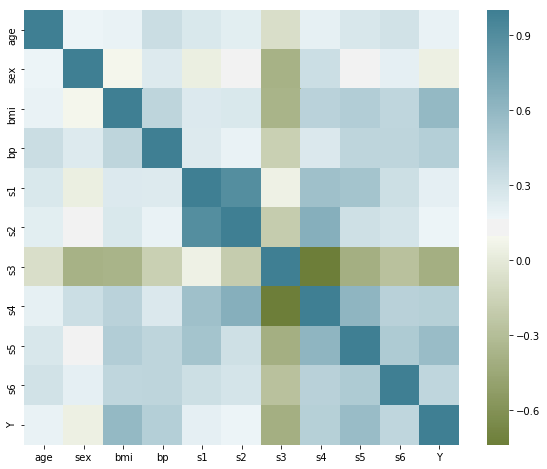

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(100, 220, as_cmap=True),
            square=True, ax=ax)

In [72]:
from sklearn.decomposition import PCA
X=data
y=target

pca = PCA(n_components=1, whiten=False)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]]
[0.0091252]


In [65]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]
 [ 0.49466811 -0.10685833  0.1675317   0.51356804 -0.0685867  -0.26969438
   0.38602787 -0.38068121  0.0636315   0.27684271]]
[0.0091252  0.00338394 0.00273461]


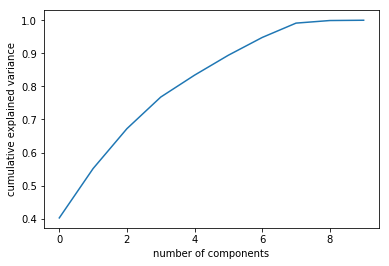

In [67]:
pca1 = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

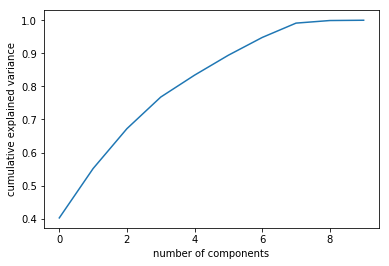

In [71]:
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
sex1 = df.loc[df['sex'] < 0]
print(sex1)

          age       sex       bmi        bp        s1        s2        s3  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
12   0.016281 -0.044642 -0.028840 -0.009113 -0.004321 -0.009769  0.044958   
14   0.045341 -0.044642 -0.025607 -0.012556  0.017694 -0.000061  0.081775   
16  -0.005515 -0.044642  0.042296  0.049415  0.024574 -0.023861  0.074412   
18  -0.038207 -0.044642 -0.010517 -0.036656 -0.037344 -0.019476 -0.028674   
19  -0.027310 -0.044642 -0.018062 -0.040099 -0.002945 -0.011335  0.037595   
20  -0.049105 -0.044642 -0.056863 -0.043542 -0.045599 -0.043276  0.000779   

In [17]:
sex2 = df.loc[df['sex'] > 0]
print(sex2)

          age      sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.05068  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2    0.085299  0.05068  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
6   -0.045472  0.05068 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.05068 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.05068  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
11   0.027178  0.05068  0.017506 -0.033214 -0.007073  0.045972 -0.065491   
13   0.005383  0.05068 -0.001895  0.008101 -0.004321 -0.015719 -0.002903   
15  -0.052738  0.05068 -0.018062  0.080401  0.089244  0.107662 -0.039719   
17   0.070769  0.05068  0.012117  0.056301  0.034206  0.049416 -0.039719   
21  -0.085430  0.05068 -0.022373  0.001215 -0.037344 -0.026366  0.015505   
23   0.045341  0.05068  0.060618  0.031053  0.028702 -0.047347 -0.054446   
25  -0.067268  0.05068 -0.012673 -0.040099 -0.015328  0.004636 -0.058127   
29   0.06713

In [54]:
from plotly import tools
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x=sex1['age'], y=sex1['Y'],
    name='Age Sex 1',
    mode='markers',
    marker = {'color': '#7F3225', 'size': 10})

trace1 = go.Scatter(
    x=sex2['age'], y=sex2['Y'],
    name='Age Sex 2',
    mode='markers',
    marker={'color': '#7F3225', 'symbol': 'x', 'size': 10})

trace2 = go.Scatter(
    x=sex1['bmi'], y=sex1['Y'],
    name='BMI Sex 1',
    mode='markers',
    marker = {'color': '#F09E06', 'size': 10})

trace3 = go.Scatter(
    x=sex2['bmi'], y=sex2['Y'],
    name='BMI Sex 2',
    mode='markers',
    marker={'color': '#F09E06', 'symbol': 'x', 'size': 10})

trace4 = go.Scatter(
    x=sex1['bp'], y=sex1['Y'],
    name='BP Sex 1',
    mode='markers',
    marker = {'color': '#54F006', 'size': 10})

trace5 = go.Scatter(
    x=sex2['bp'], y=sex2['Y'],
    name='BP Sex 2',
    mode='markers',
    marker={'color': '#54F006', 'symbol': 'x', 'size': 10})

trace6 = go.Scatter(
    x=sex1['s1'], y=sex1['Y'],
    name='S1 Sex 1',
    mode='markers',
    marker = {'color': '#067BF0', 'size': 10})

trace7 = go.Scatter(
    x=sex2['s1'], y=sex2['Y'],
    name='S1 Sex 2',
    mode='markers',
    marker={'color': '#067BF0', 'symbol': 'x', 'size': 10})

trace8 = go.Scatter(
    x=sex1['s2'], y=sex1['Y'],
    name='S2 Sex 1',
    mode='markers',
    marker = {'color': '#8C06F0', 'size': 10})

trace9 = go.Scatter(
    x=sex2['s2'], y=sex2['Y'],
    name='S2 Sex 2',
    mode='markers',
    marker={'color': '#8C06F0', 'symbol': 'x', 'size': 10})

trace10 = go.Scatter(
    x=sex1['s3'], y=sex1['Y'],
    name='S3 Sex 1',
    mode='markers',
    marker = {'color': '#F006EC', 'size': 10})

trace11 = go.Scatter(
    x=sex2['s3'], y=sex2['Y'],
    name='S3 Sex 2',
    mode='markers',
    marker={'color': '#F006EC', 'symbol': 'x', 'size': 10})

trace12 = go.Scatter(
    x=sex1['s4'], y=sex1['Y'],
    name='S4 Sex 1',
    mode='markers',
    marker = {'color': '#DA778F', 'size': 10})

trace13 = go.Scatter(
    x=sex2['s4'], y=sex2['Y'],
    name='S4 Sex 2',
    mode='markers',
    marker={'color': '#DA778F', 'symbol': 'x', 'size': 10})

trace14 = go.Scatter(
    x=sex1['s5'], y=sex1['Y'],
    name='S5 Sex 1',
    mode='markers',
    marker = {'color': '#00DCFF', 'size': 10})

trace15 = go.Scatter(
    x=sex2['s5'], y=sex2['Y'],
    name='S5 Sex 2',
    mode='markers',
    marker={'color': '#00DCFF', 'symbol': 'x', 'size': 10})

trace16 = go.Scatter(
    x=sex1['s6'], y=sex1['Y'],
    name='S6 Sex 1',
    mode='markers',
    marker = {'color': '#241F2A', 'size': 10})

trace17 = go.Scatter(
    x=sex2['s6'], y=sex2['Y'],
    name='S6 Sex 2',
    mode='markers',
    marker={'color': '#241F2A', 'symbol': 'x', 'size': 10})

plot_data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, 
        trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17]

layout = go.Layout(
    xaxis = dict(title = 'Feature Scale', zeroline=False),
    yaxis= dict(title= 'Y', zeroline=False),
    showlegend = True,
    title='Y vs. All Features Plot')

fig = dict(data=plot_data, layout=layout)
iplot(fig, filename='YvsAllFeatures')
# result: plot is not very informative; the data is randomly scattered

In [41]:
nosex = np.delete(data, 1, axis=1)
print(nosex)

[[ 0.03807591  0.06169621  0.02187235 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.05147406 -0.02632783 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.04445121 -0.00567061 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844 -0.01590626  0.01728186 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248  0.03906215  0.00121513 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.0730303  -0.08141377 ... -0.03949338 -0.00421986
   0.00306441]]


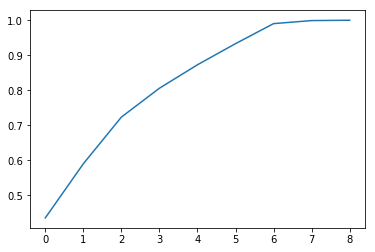

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA().fit(nosex)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [55]:
newX = StandardScaler().fit_transform(nosex)
print(newX)

otherx = StandardScaler()
otherx.fit(nosex)
transformed = otherx.transform(nosex)
print(transformed)
#pca = PCA(n_components=8)
#principalComponents = pca.fit_transform(newX)


[[ 0.80050009  1.29708846  0.45983993 ... -0.05449919  0.41855058
  -0.37098854]
 [-0.03956713 -1.08218016 -0.55351103 ... -0.83030083 -1.43655059
  -1.93847913]
 [ 1.79330681  0.93453324 -0.11921776 ... -0.05449919  0.06020733
  -0.54515416]
 ...
 [ 0.87686984 -0.33441002  0.36333032 ... -0.23293356 -0.98558469
   0.32567395]
 [-0.9560041   0.82123474  0.02554666 ...  0.55838411  0.93615545
  -0.54515416]
 [-0.9560041  -1.53537419 -1.71162641 ... -0.83030083 -0.08871747
   0.06442552]]
[[ 0.80050009  1.29708846  0.45983993 ... -0.05449919  0.41855058
  -0.37098854]
 [-0.03956713 -1.08218016 -0.55351103 ... -0.83030083 -1.43655059
  -1.93847913]
 [ 1.79330681  0.93453324 -0.11921776 ... -0.05449919  0.06020733
  -0.54515416]
 ...
 [ 0.87686984 -0.33441002  0.36333032 ... -0.23293356 -0.98558469
   0.32567395]
 [-0.9560041   0.82123474  0.02554666 ...  0.55838411  0.93615545
  -0.54515416]
 [-0.9560041  -1.53537419 -1.71162641 ... -0.83030083 -0.08871747
   0.06442552]]


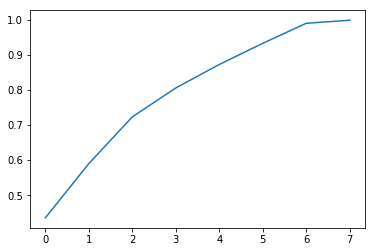

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))